In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amits\OneDrive\Desktop\Desktop\placement.csv")

In [3]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


<Axes: xlabel='cgpa', ylabel='Density'>

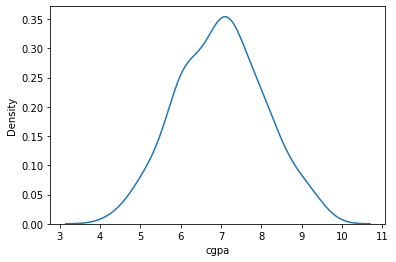

In [4]:
sns.kdeplot(data=df, x='cgpa')

In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


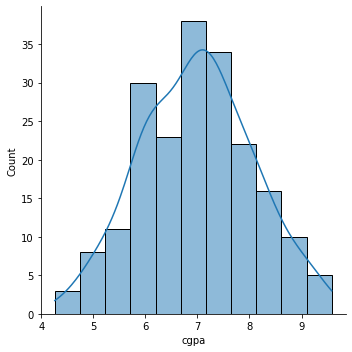

In [7]:
sns.displot(df['cgpa'], kind="hist", kde=True)

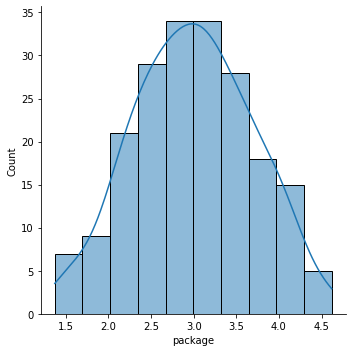

In [8]:
sns.displot(df['package'], kind="hist", kde=True)

In [9]:
corr = df.corr()
corr

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: >

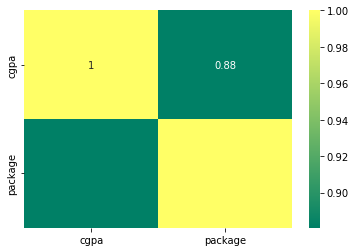

In [10]:
sns.heatmap(corr , annot=True, cmap="summer")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df[['cgpa']]

In [13]:
y=df[['package']]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mse=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_pred, y_test)

In [21]:
print("test MAE:",MAE)

test MAE: 0.26818476036281685


In [22]:
x_pred=lr.predict(x_train)

In [23]:
ms=mean_squared_error(x_pred, y_train)
mae=mean_absolute_error(x_pred, y_train)

In [24]:
print('train_score is:', ms)
print('testing score is: ',mse)


train_score is: 0.10748519490403062
testing score is:  0.1064496641140147


In [25]:
print('train_score is:', mae)

train_score is: 0.2569206142619846


In [26]:
from sklearn.svm import SVR

In [27]:
svr=SVR(kernel='linear', C=1.0)

In [28]:
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
mean=mean_squared_error(y_test,y_pred)

In [30]:
x_pred=svr.predict(x_train)
mea=mean_squared_error(x_pred, y_train)
print('train_score is:', mea)
print('testing score is: ',mean)

train_score is: 0.1077564052195153
testing score is:  0.10900496062988331


In [31]:
import pickle

In [32]:
pickle.dump(svr,open('svr.pkl','wb'))

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso=Lasso()
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)

In [35]:
mean_absolute_error(y_test, y_pred)

0.575928

In [36]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, 4, 100)  # Range of alpha values to test
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation
lasso_cv.fit(x_train, y_train)
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best alpha: 0.0001


In [37]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)
score = lasso.score(x_test, y_test)  
print("Model score on test data:", score)

Model score on test data: 0.7555306027309647
